In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv("Matrix.csv")
drop_list = ['Unnamed: 0']
print(data.shape)
for word in data.columns[:-2]:
    if sum(data[word]) == 0:
        drop_list.append(word)
data = data.drop(drop_list, axis = 1)
data.head(10)

(41, 315)


,high,buzz,buzzed,sky,cloud,clouds,stoned,ripped,tipsy,wasted,...,vanity,vexed,wary,weary,woe,wonder,worried,zest,Time,Death
0,0.000318,0.000000,0.000024,0.000037,0.000012,0.000024,0.000024,0.000012,0.000012,0.000024,...,0.000024,0.0,0.000000,0.000000,0.000000,0.000147,0.000049,0.0,2015-11,52386
1,0.000540,0.000012,0.000000,0.000037,0.000012,0.000025,0.000012,0.000061,0.000012,0.000012,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000147,0.000074,0.0,2015-12,52623
2,0.000380,0.000012,0.000000,0.000074,0.000024,0.000024,0.000000,0.000012,0.000000,0.000012,...,0.000012,0.0,0.000012,0.000000,0.000000,0.000196,0.000012,0.0,2016-01,52902
3,0.000431,0.000024,0.000036,0.000060,0.000024,0.000024,0.000000,0.000024,0.000000,0.000036,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000144,0.000048,0.0,2016-02,53834
4,0.000454,0.000023,0.000000,0.000035,0.000012,0.000035,0.000000,0.000012,0.000012,0.000035,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000117,0.000023,0.0,2016-03,54781
5,0.000442,0.000012,0.000000,0.000036,0.000012,0.000000,0.000012,0.000000,0.000012,0.000012,...,0.000000,0.0,0.000000,0.000000,0.000012,0.000167,0.000012,0.0,2016-04,55763
6,0.000372,0.000024,0.000012,0.000108,0.000012,0.000084,0.000000,0.000012,0.000000,0.000024,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000144,0.000072,0.0,2016-05,56465
7,0.000580,0.000000,0.000000,0.000048,0.000024,0.000206,0.000024,0.000024,0.000000,0.000048,...,0.000012,0.0,0.000000,0.000000,0.000000,0.000121,0.000060,0.0,2016-06,57428
8,0.000294,0.000000,0.000000,0.000047,0.000000,0.000035,0.000012,0.000000,0.000000,0.000012,...,0.000000,0.0,0.000000,0.000012,0.000012,0.000153,0.000047,0.0,2016-07,58525
9,0.000443,0.000012,0.000000,0.000093,0.000023,0.000035,0.000000,0.000012,0.000000,0.000023,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000187,0.000023,0.0,2016-08,59417


In [3]:
cor_vec = data.corr()['Death'][:-1]
#for i in range(cor_vec.shape[0]):
    
top_index = cor_vec.abs().sort_values(ascending = False)[:50].index
cor_vec.abs().sort_values(ascending = False)[:50]

happy            0.823371
sleep            0.775933
love             0.748141
like             0.570817
proud            0.560203
mad              0.512197
hurt             0.445481
content          0.431555
crazy            0.429103
sky              0.413345
aggravation      0.402089
scared           0.384554
drugged          0.382008
rage             0.380278
fury             0.369668
nirvana          0.357038
frustrate        0.354544
fried            0.353257
dope             0.352471
anxiety          0.344002
embarrassment    0.342515
sympathy         0.341472
vain             0.329736
open             0.328813
contentment      0.324667
elation          0.324667
jealous          0.323273
enthusiasm       0.316801
annoying         0.315923
alarm            0.311851
passion          0.309549
irritated        0.308615
clouds           0.306781
homesick         0.299481
relief           0.296835
shame            0.293257
enraptured       0.292372
suffering        0.290512
relieved    

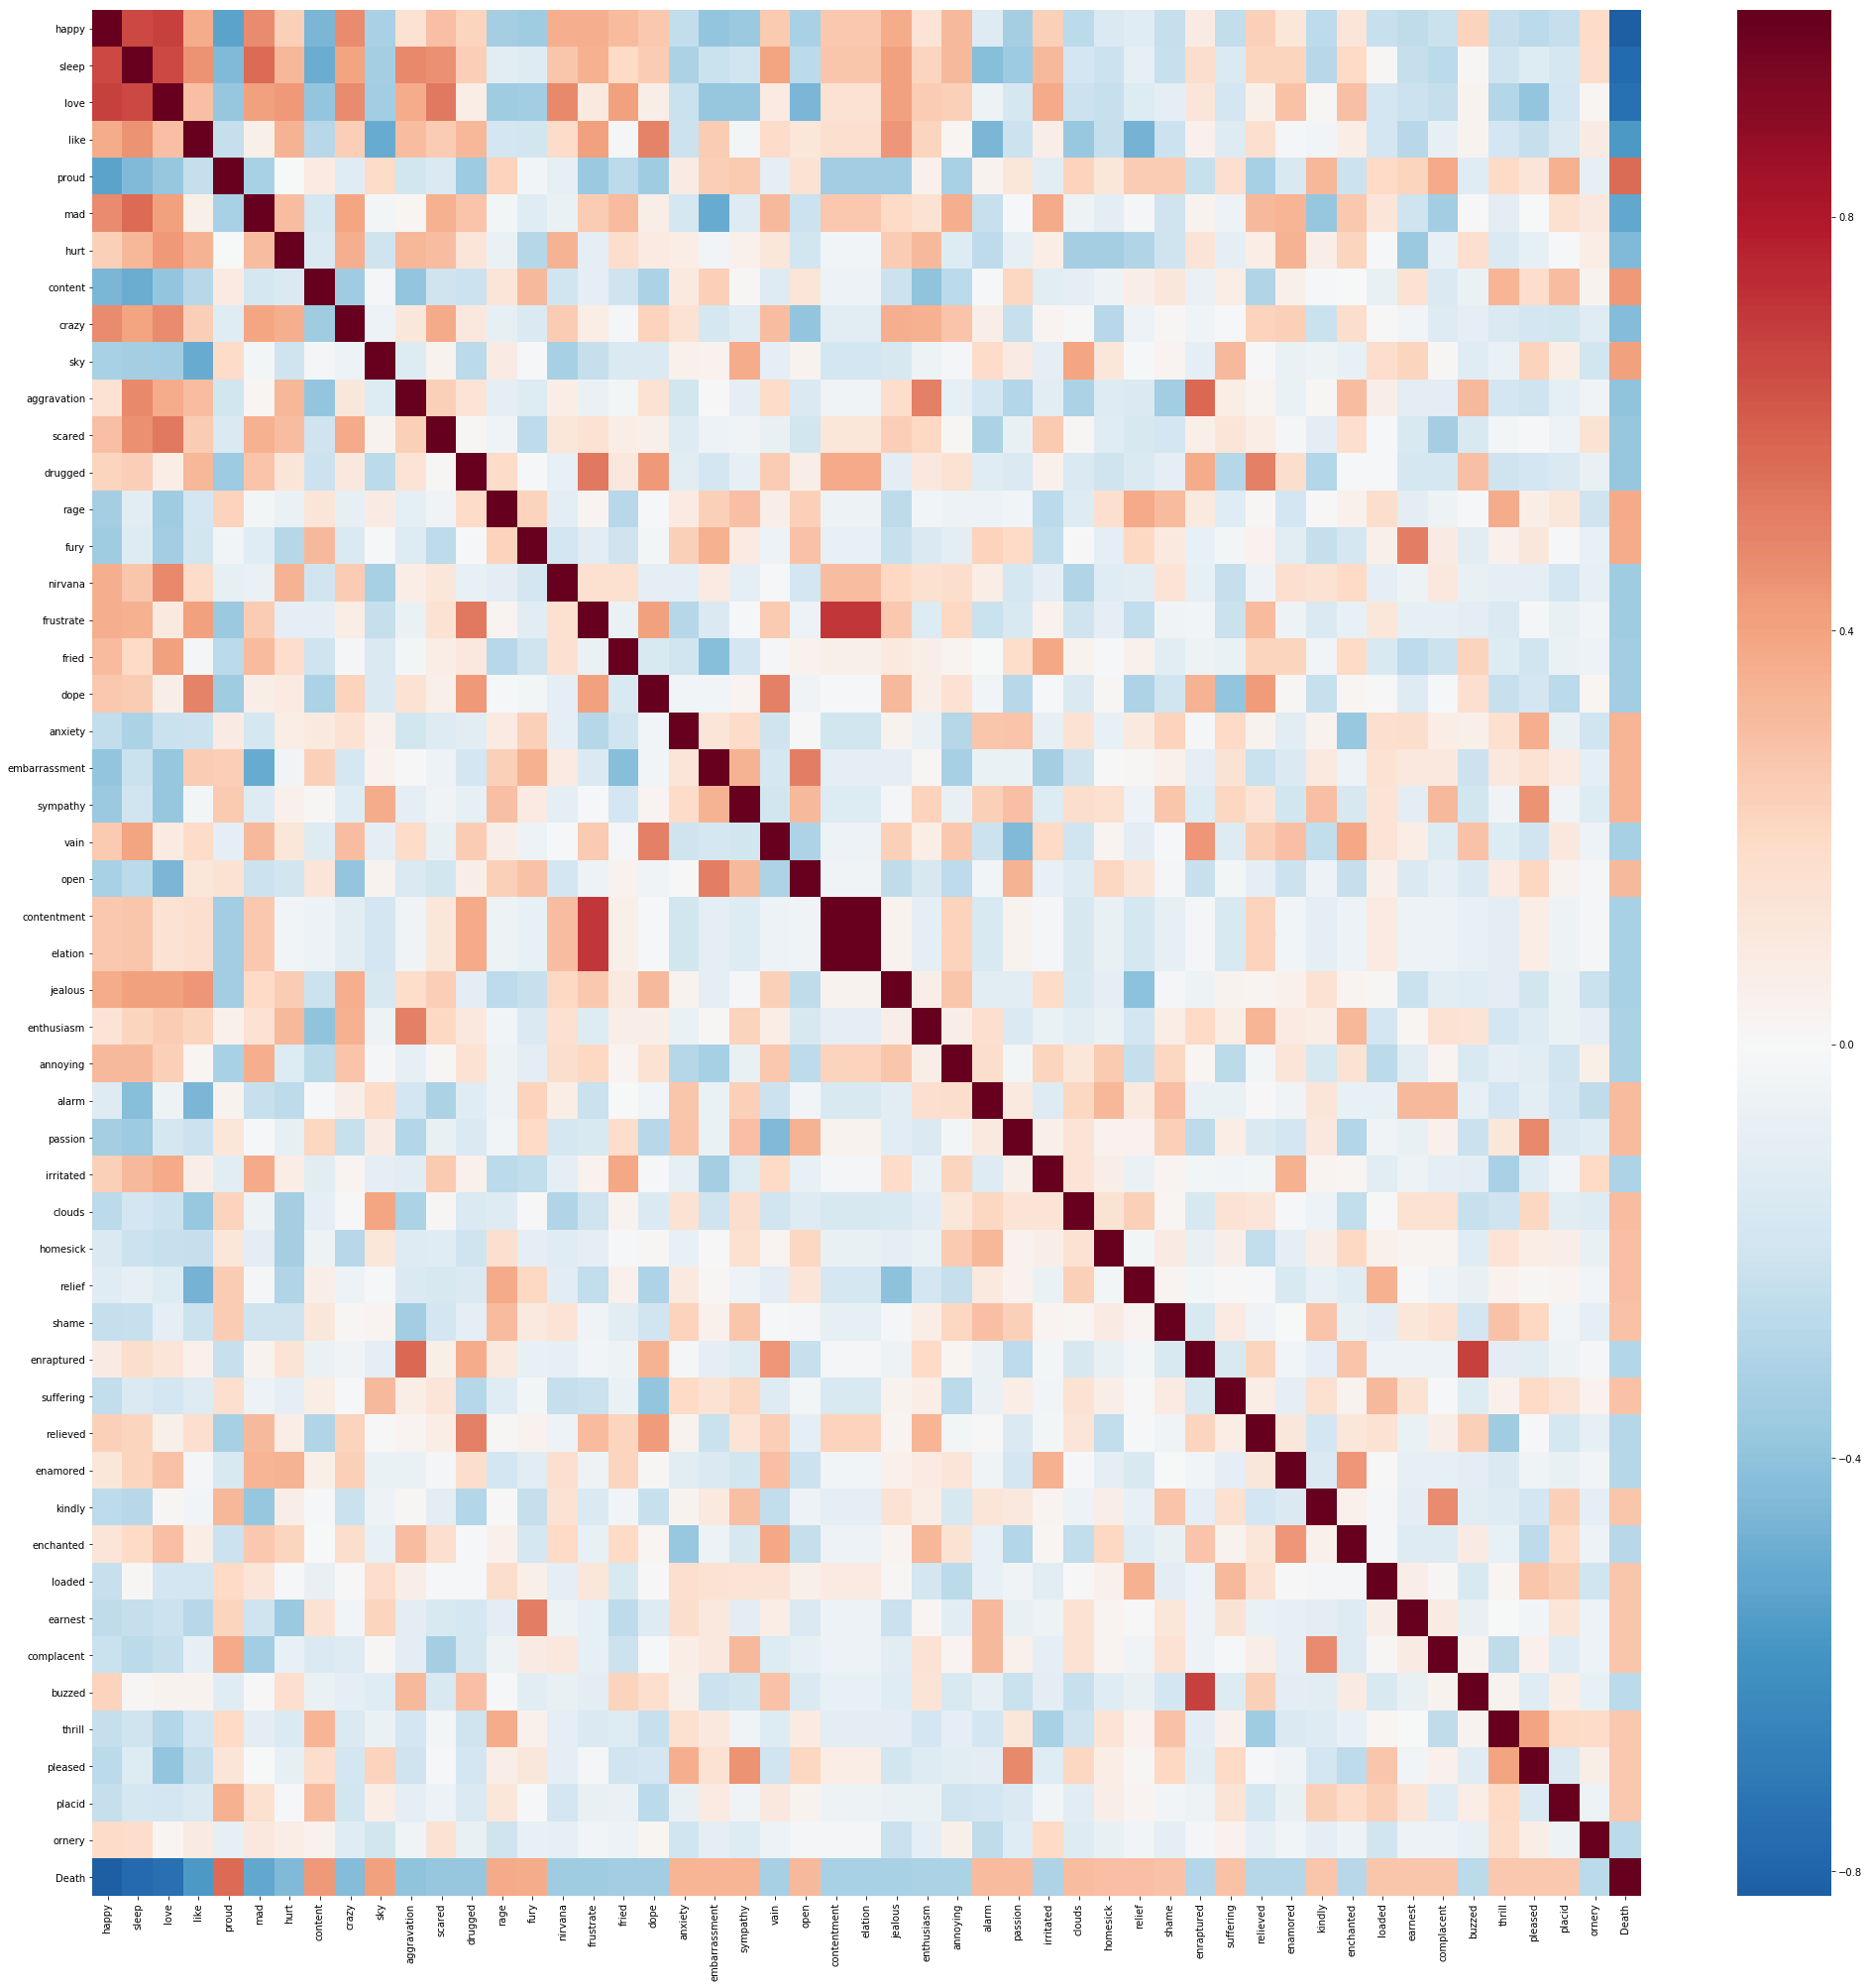

In [4]:
mat_index = list(top_index)
mat_index.append("Death")
mat_index = pd.Index(mat_index)
cor_mat = data[mat_index].corr()
plt.figure(figsize = (35,35))
ax = sns.heatmap(cor_mat, center = 0, cmap = "RdBu_r")

In [5]:
X = data[top_index]
Death = data["Death"]

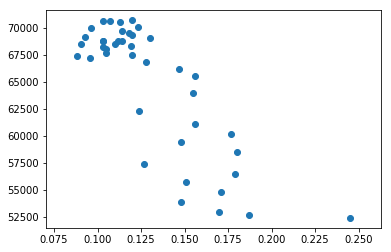

In [6]:
plt.scatter(data['happy']*10000000, data['Death'])
plt.show()

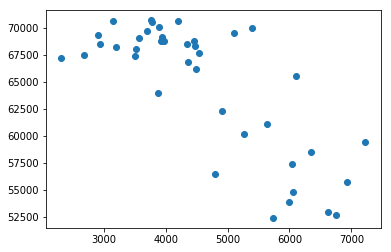

In [7]:
plt.scatter(data['sleep']*10000000, data['Death'])
plt.show()

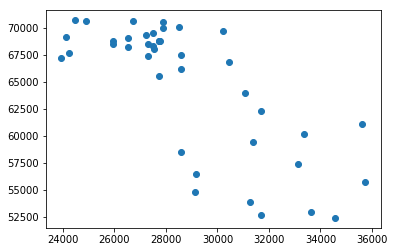

In [8]:
plt.scatter(data['love']*10000000, data['Death'])
plt.show()

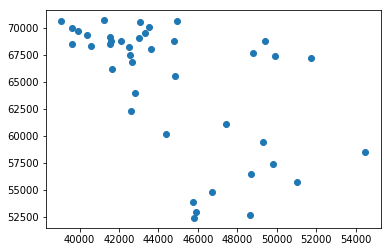

In [9]:
plt.scatter(data['like']*10000000, data['Death'])
plt.show()

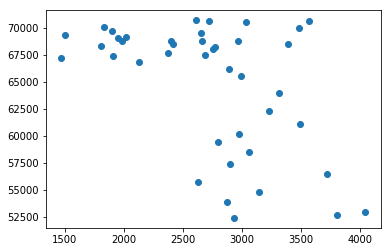

In [10]:
plt.scatter(data['mad']*10000000, data['Death'])
plt.show()

It shows pattern in of the above plots which is skewed. So we may discover about possible transformation that may fit the data to pre-process it in order to suit regression models better.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X[['happy']]*100, Death, train_size = 0.8, test_size = 0.2, random_state = 0)

In [12]:
lnr_reg = LinearRegression()
lnr_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

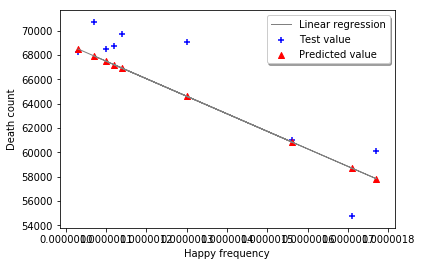

In [13]:
fig, ax = plt.subplots()
y_pred = lnr_reg.predict(X_test)
ax.plot(X_test, y_pred, label = 'Linear regression', color = 'grey', linewidth = 1)
ax.scatter(X_test, y_test, color = 'blue', marker = '+', label = 'Test value')
ax.scatter(X_test, y_pred, color = 'red', marker = '^', label = 'Predicted value')
plt.legend(shadow = True)
plt.xlabel("Happy frequency")
plt.ylabel("Death count")
plt.show()

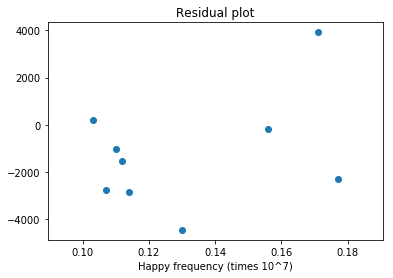

In [14]:
residual = y_pred - y_test
plt.scatter(X_test*100000, residual)
plt.title("Residual plot")
plt.xlabel("Happy frequency (times 10^7)")
plt.show()

In [15]:
print("=========================================")
print("<Linear Regression Model using happy frequency to predict death count>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Linear Regression Model using happy frequency to predict death count>
Coefficient of determination (R^2): 0.759197
Root Mean Squared Error (RMSE): 2577.816096


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Death, train_size = 0.8, test_size = 0.2, random_state = 0)

In [17]:
rfg_reg = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rfg_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

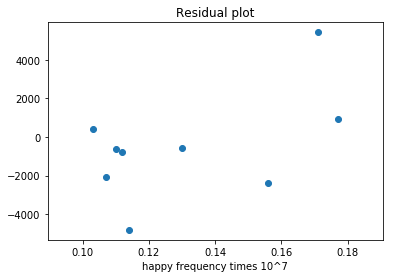

In [18]:
y_pred = rfg_reg.predict(X_test)
residual = y_pred - y_test
plt.scatter(X_test['happy']*10000000, residual)
plt.title("Residual plot")
plt.xlabel("happy frequency times 10^7")
plt.show()

In [19]:
print("=========================================")
print("<Random Forest Regression using all features to predict Death rate>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Random Forest Regression using all features to predict Death rate>
Coefficient of determination (R^2): 0.738168
Root Mean Squared Error (RMSE): 2688.017328


In [20]:
X_test.shape

(9, 50)

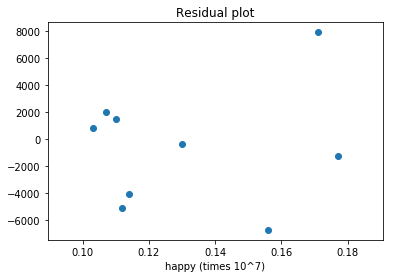

,happy,sleep,love,like,proud,mad,hurt,content,crazy,sky,...,enchanted,loaded,earnest,complacent,buzzed,thrill,pleased,placid,ornery,Death
0,0.000001,0.042000,0.248848,0.390596,0.021000,0.035700,0.014700,0.00630,0.030450,0.013650,...,0.0,0.00315,0.00000,0.00000,0.00000,0.00105,0.00315,0.00000,0.00000,2021.860911
1,0.000001,0.043435,0.259553,0.415285,0.037079,0.033901,0.013772,0.00530,0.036020,0.010594,...,0.0,0.00530,0.00106,0.00000,0.00106,0.00106,0.00106,0.00106,0.00000,1470.560550
2,0.000001,0.035758,0.265473,0.430175,0.026005,0.019504,0.014086,0.00325,0.031423,0.009750,...,0.0,0.00217,0.00000,0.00108,0.00000,0.00000,0.00000,0.00000,0.00000,-367.847825
3,0.000002,0.060594,0.291318,0.467273,0.019810,0.031462,0.017479,0.00466,0.026801,0.003500,...,0.0,0.00000,0.00000,0.00000,0.00000,0.00117,0.00117,0.00000,0.00233,7902.396769
4,0.000002,0.052734,0.333601,0.443655,0.026367,0.029806,0.021781,0.00344,0.055027,0.004590,...,0.0,0.00000,0.00000,0.00000,0.00000,0.00115,0.00115,0.00000,0.00000,-1269.265359
5,0.000001,0.039776,0.277327,0.493885,0.027622,0.019888,0.020993,0.00552,0.030937,0.007730,...,0.0,0.00221,0.00000,0.00000,0.00000,0.00000,0.00110,0.00000,0.00000,-5100.796020
6,0.000001,0.036985,0.302220,0.399438,0.033815,0.019021,0.012681,0.00106,0.026418,0.010567,...,0.0,0.00211,0.00106,0.00106,0.00000,0.00000,0.00000,0.00000,0.00000,-4062.584107
7,0.000002,0.056320,0.355940,0.474211,0.023654,0.034918,0.018022,0.00338,0.036045,0.006760,...,0.0,0.00113,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-6746.689116
8,0.000001,0.031966,0.265314,0.425142,0.028769,0.027704,0.011721,0.00639,0.028769,0.005330,...,0.0,0.00000,0.00107,0.00000,0.00000,0.00107,0.00107,0.00000,0.00000,820.140507


In [21]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)  
y_pred = lasso_reg.predict(X_test)
residual = y_pred - y_test
plt.scatter(X_test['happy']*10000000, residual)
plt.title("Residual plot")
plt.xlabel("happy (times 10^7)")
plt.show()
X_test = X_test.set_index(pd.Index([i for i in range(X_test.shape[0])]))

residual = pd.DataFrame(residual)
residual = residual.set_index(pd.Index([i for i in range(X_test.shape[0])]))
output = pd.concat([X_test*100,residual], axis = 1)
output

In [22]:
print("=========================================")
print("<Lasso regression using all features to predict Death rate>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Lasso regression using all features to predict Death rate>
Coefficient of determination (R^2): 0.359169
Root Mean Squared Error (RMSE): 4205.259211


In [23]:
for C in [0.001,0.01,0.1,1,10]:
    log_reg = LogisticRegression(C= C, random_state = 0, solver = 'liblinear')
    log_reg.fit(X_train,y_train)
    y_pred = log_reg.predict(X_test)
    print("=========================================")
    print("<Logistic regression using all features to predict Death rate with C = {}>".format(C))
    print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
    print("=========================================")
#residual = y_pred - y_test
#plt.scatter(X_test['happy']*100000, residual)
#plt.title("Residual plot")
#plt.xlabel("happy (times 10^7)")
#plt.show()


<Logistic regression using all features to predict Death rate with C = 0.001>
Coefficient of determination (R^2): -3.560888
Root Mean Squared Error (RMSE): 11218.783941
<Logistic regression using all features to predict Death rate with C = 0.01>
Coefficient of determination (R^2): -3.560888
Root Mean Squared Error (RMSE): 11218.783941
<Logistic regression using all features to predict Death rate with C = 0.1>
Coefficient of determination (R^2): -3.560888
Root Mean Squared Error (RMSE): 11218.783941
<Logistic regression using all features to predict Death rate with C = 1>
Coefficient of determination (R^2): 0.208652
Root Mean Squared Error (RMSE): 4673.098365
<Logistic regression using all features to predict Death rate with C = 10>
Coefficient of determination (R^2): -1.301231
Root Mean Squared Error (RMSE): 7968.951946


/Users/lantingli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lantingli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lantingli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lantingli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Fut

In [24]:
gpr = GaussianProcessRegressor()
gpr.fit(X_train, y_train)
y_pred = gpr.predict(X_test)
print("=========================================")
print("<Gaussian process regression using all features to predict Death rate>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Gaussian process regression using all features to predict Death rate>
Coefficient of determination (R^2): 0.121400
Root Mean Squared Error (RMSE): 4923.983852


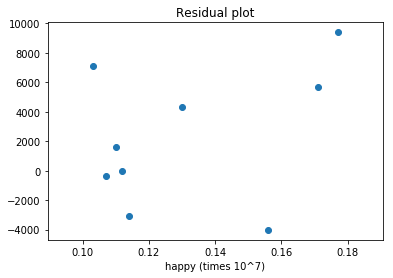

In [25]:
residual = y_pred - y_test
plt.scatter(X_test['happy']*10000000, residual)
plt.title("Residual plot")
plt.xlabel("happy (times 10^7)")
plt.show()

In [26]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print("=========================================")
print("<Stochastic Gradient Descent Regressor using all features to predict Death count>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Stochastic Gradient Descent Regressor using all features to predict Death count>
Coefficient of determination (R^2): -48.939072
Root Mean Squared Error (RMSE): 37122.849910


/Users/lantingli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [27]:
mlp = MLPRegressor(random_state = 0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("=========================================")
print("<Multi-layer perceptron regressor using all features to predict Death count>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Multi-layer perceptron regressor using all features to predict Death count>
Coefficient of determination (R^2): -156.288127
Root Mean Squared Error (RMSE): 65882.344827


/Users/lantingli/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
